# Practice 3A: Evaluation
### Wine dataset: multiclass classification problem
https://archive.ics.uci.edu/ml/datasets/Wine
 

# (1) Load explore and preprocess (if needed) the dataset

In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()

In [ ]:
df=pd.DataFrame(data=data.data, columns=data.feature_names)

In [ ]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


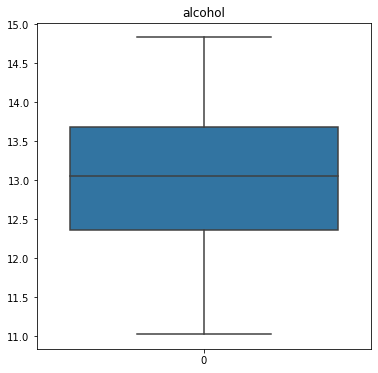

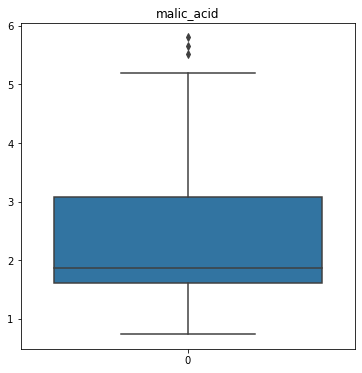

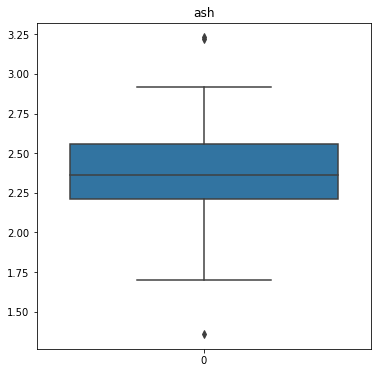

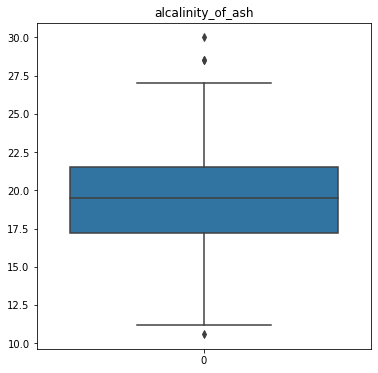

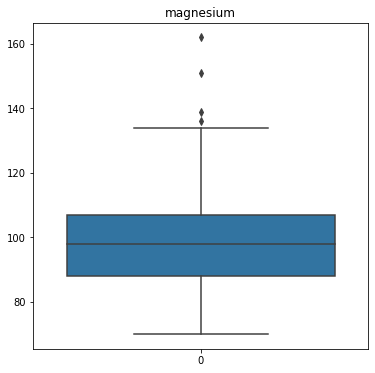

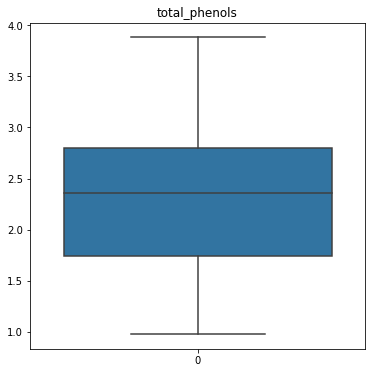

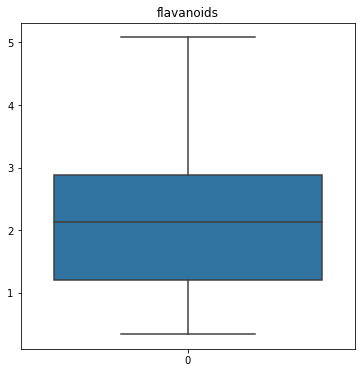

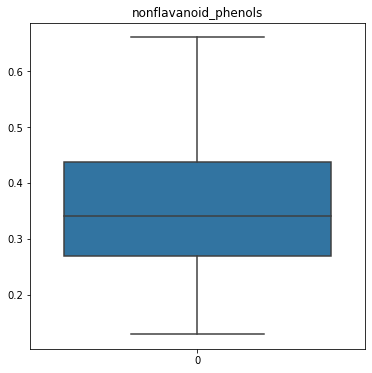

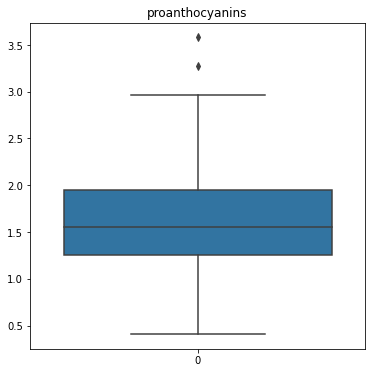

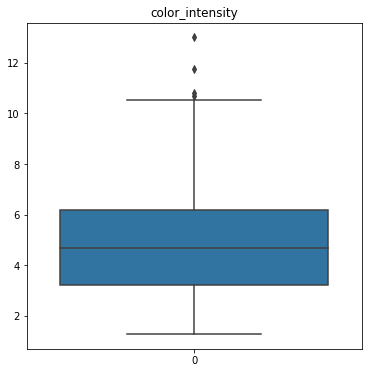

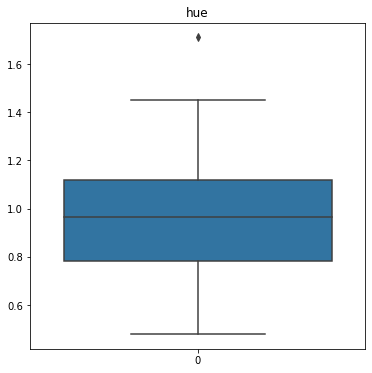

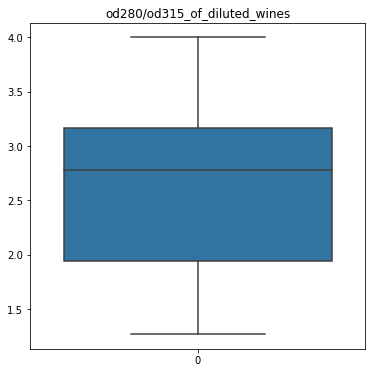

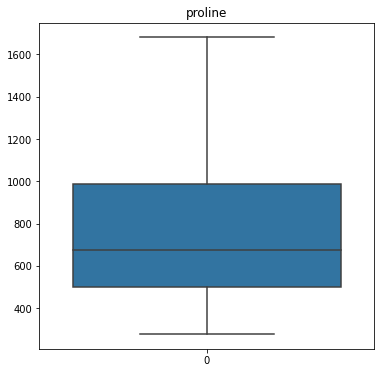

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df.columns:
  plt.figure(figsize=(6,6))
  ax = sns.boxplot(data=df[column]) 
  plt.title(column)
  plt.show()

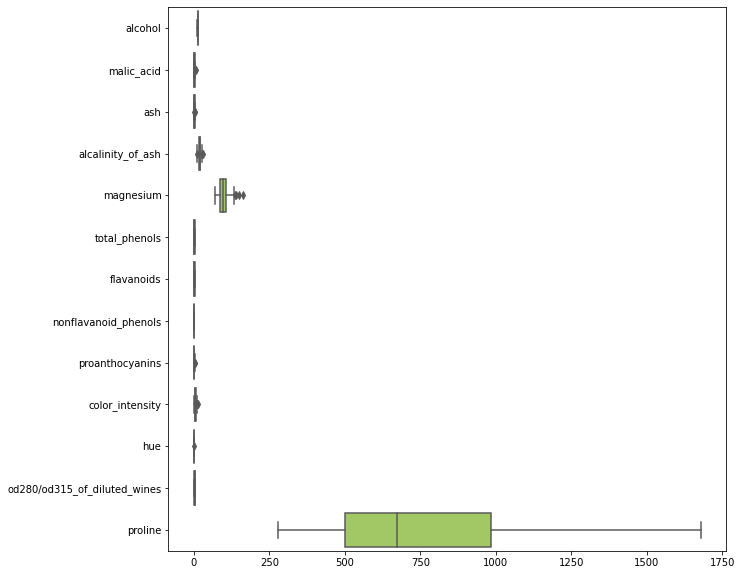

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, orient="h", palette="Set2")

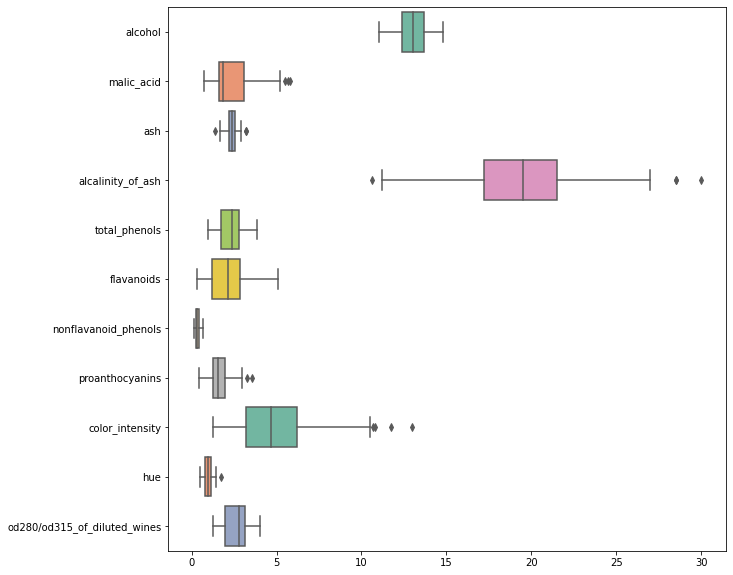

In [ ]:
plt.figure(figsize=(10,10))
df_reduced=df.drop(['proline','magnesium'], axis=1)
ax = sns.boxplot(data=df_reduced, orient="h", palette="Set2")

We need a scaling procedure. I will apply a robust scaler in order to handle the outliers

In [ ]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(df.values)
scaled_data = transformer.transform(df.values)

In [ ]:
df_scaled=pd.DataFrame(data=scaled_data, columns=df.columns)

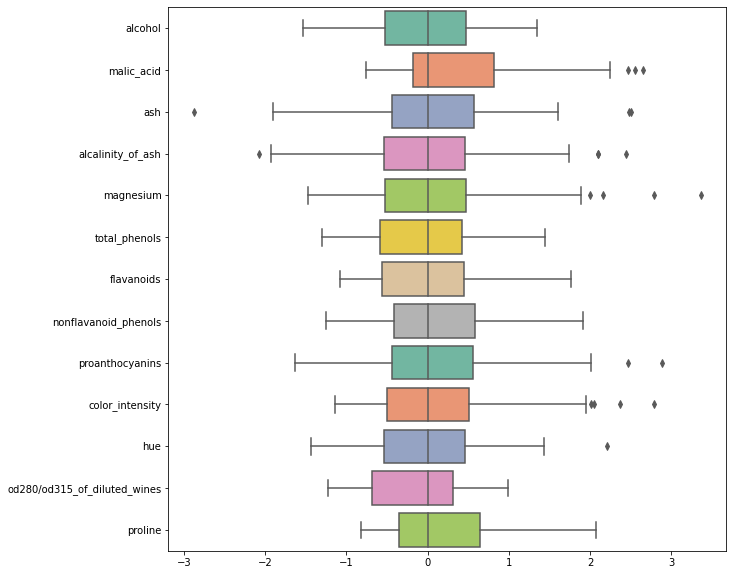

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_scaled, orient="h", palette="Set2")

In [ ]:
X=df_scaled.values
y= data.target

# (2) Train a RandomForest model using the default parameters and an hold-out methodology

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Holdout methodology
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# (3) Visualize the model performances (identify the metrics necessary to access the generalization performances of the model)

In [ ]:
from sklearn.metrics import classification_report

print("Train accuracy: {}".format(rf.score(X_train, y_train)))
print("Test accuracy: {}".format(rf.score(X_test, y_test)))

Train accuracy: 1.0
Test accuracy: 0.1111111111111111


In [ ]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.11      1.00      0.20         6
           2       0.00      0.00      0.00        48

    accuracy                           0.11        54
   macro avg       0.06      0.50      0.10        54
weighted avg       0.01      0.11      0.02        54



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix 
confusion = confusion_matrix(y_test, rf.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 6  0]
 [48  0]]


#(4) Is a cross validation methodology necessary to access the performances of the model? If yes, which kind of cross validation? Run it and visualize the related model performances

Validating the wine dataset holding-out the test-set (30%) without shuffling is not a good idea. We might shuffle before splitting, or use a stratified cross validation strategy or a k-fold shaffling the samples

In [ ]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_val_score 

kfold = StratifiedKFold(n_splits=3)
rf = RandomForestClassifier(random_state=0)

print("Cross-validation scores:\n{}".format( cross_val_score(rf, X, y, cv=kfold)))

Cross-validation scores:
[0.95       0.89830508 0.96610169]


#(5) Is there any difference with the performances calculated above (holdout)?

The model was able to learn all the classes, hence it is performing well both on training and on testing

#(6) GridSearch the parameters of the RandomForest: `n_estimators` in the range `[50, 200]` and `max_features` in the range [2, 5]. Which scoring methodology would be useful for the GridSearch validation (accuracy is default scoring)?

In [ ]:
param_grid = {'max_features': [2, 3, 4, 5],
              'n_estimators': [50, 100, 150, 200]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_features': [2, 3, 4, 5], 'n_estimators': [50, 100, 150, 200]}


In [ ]:
from sklearn.model_selection import GridSearchCV 

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_features': 2, 'n_estimators': 150}
Best cross-validation score: 0.98


#(7) Use the selected parameters to train a model and evaluate it.

Fitting the `GridSearchCV` object not only searches for the best parameters, but also automatically fits a new model on the whole training dataset with the parameters that yielded the best cross-validation performance.

In [ ]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 1.00


#(8)  Select from the dataset samples from only 2 classes (this subset of the original dataset will be used to run a binary classification problem)

In [ ]:
df_scaled_2classes = df_scaled[data.target!=2]
target_2classes = data.target[data.target!=2]

In [ ]:
X_new = df_scaled_2classes.values
y_new = target_2classes

# (9) Train a SVC and a RandomForest to perform the binary classification task using the default parameters.

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=0)

svc = SVC().fit(X_train, y_train)

rf=RandomForestClassifier().fit(X_train, y_train)

#(10) Compare the performances of the two models by means of the ROC curve and AUC score and discuss the results.

In [ ]:
from sklearn.metrics import roc_curve

fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc.decision_function(X_test))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr_svc, tpr_svc, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.legend(loc=4)

In [ ]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]) 
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test)) 

print("AUC for Random Forest: {:.3f}".format(rf_auc)) 
print("AUC for SVC: {:.3f}".format(svc_auc))

#(11)OPTIONAL - Compare the performances of the two models by means of the ROC curve and AUC score after grid serching the best parameters for both models

In [ ]:
## RANDOM FOREST
from sklearn.model_selection import GridSearchCV 

param_grid = {'max_features': [2, 3, 4, 5],
              'n_estimators': [50, 100, 150, 200]}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search_rf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_rf.best_score_))
rf_best = grid_search_rf.best_estimator_

In [ ]:
# SVC
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_svc = GridSearchCV(SVC(), param_grid, cv=5)
grid_search_svc.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search_svc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svc.best_score_))
svc_best = grid_search_svc.best_estimator_


Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 1.00


In [ ]:
rf_auc = roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1]) 
svc_auc = roc_auc_score(y_test, svc_best.decision_function(X_test)) 

print("AUC for Random Forest: {:.3f}".format(rf_auc)) 
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 1.000
AUC for SVC: 1.000
